In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [13]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df = pd.read_csv("heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
duplicates=df.duplicated().any()
print(duplicates)

False


In [ ]:
df.shape

(918, 12)

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [11]:
print(df.describe())


               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [16]:
# encoding categorical variables using one hot encoding
data = pd.get_dummies(df, columns=['ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])



In [17]:
#checking if encoding done
data.head()

,Age,Sex,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,M,140,289,172,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
1,49,F,160,180,156,1.0,1,False,False,True,...,True,False,False,True,False,True,False,False,True,False
2,37,M,130,283,98,0.0,0,False,True,False,...,True,False,False,False,True,True,False,False,False,True
3,48,F,138,214,108,1.5,1,True,False,False,...,True,False,False,True,False,False,True,False,True,False
4,54,M,150,195,122,0.0,0,False,False,True,...,True,False,False,True,False,True,False,False,False,True


In [ ]:
# from now on we will use encoded data i.e, store in variable named "data"
#scaling (standarization)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
data[numerical_features] = scaler.fit_transform(data[numerical_features])




In [18]:
data.head()

,Age,Sex,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,M,140,289,172,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
1,49,F,160,180,156,1.0,1,False,False,True,...,True,False,False,True,False,True,False,False,True,False
2,37,M,130,283,98,0.0,0,False,True,False,...,True,False,False,False,True,True,False,False,False,True
3,48,F,138,214,108,1.5,1,True,False,False,...,True,False,False,True,False,False,True,False,True,False
4,54,M,150,195,122,0.0,0,False,False,True,...,True,False,False,True,False,True,False,False,False,True


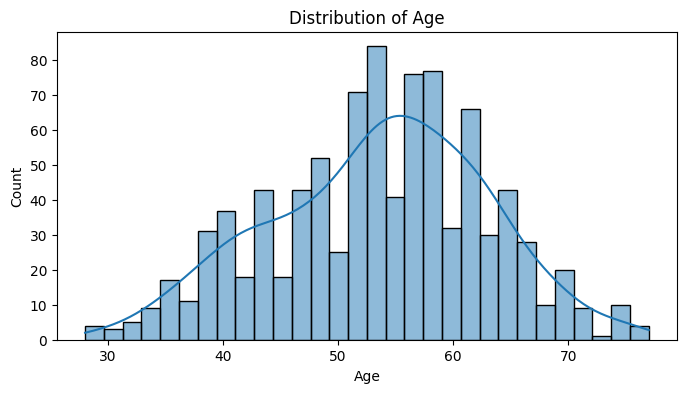

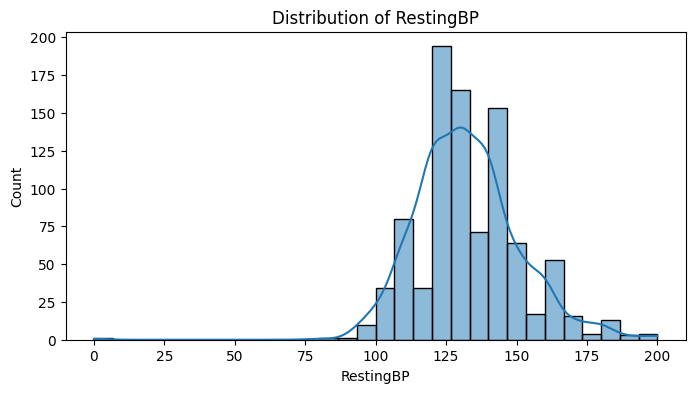

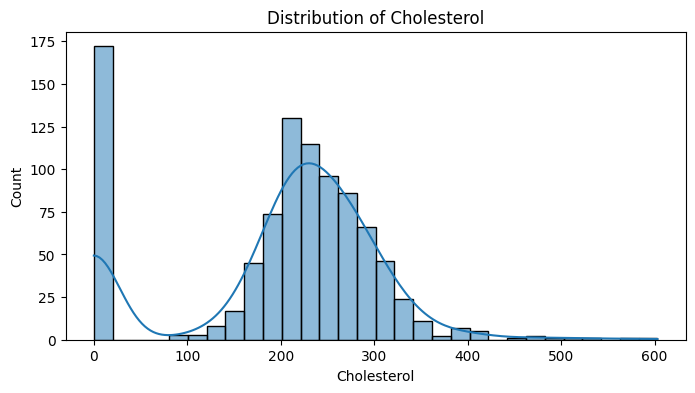

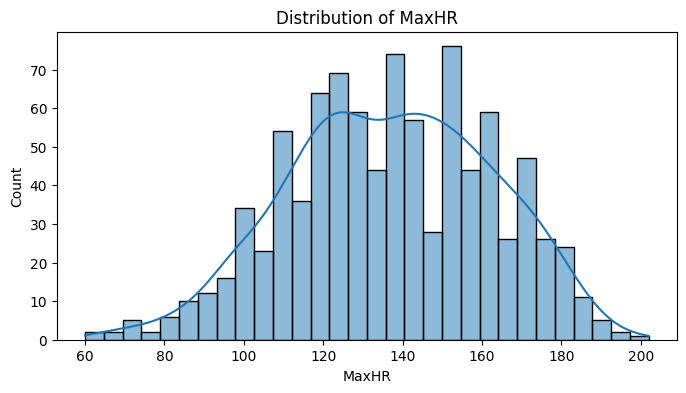

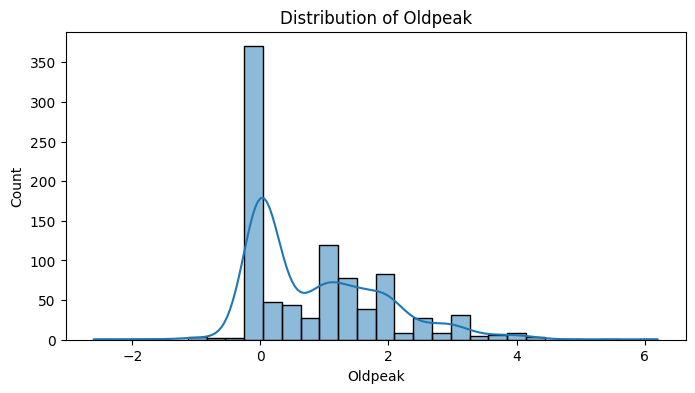

In [19]:

numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()


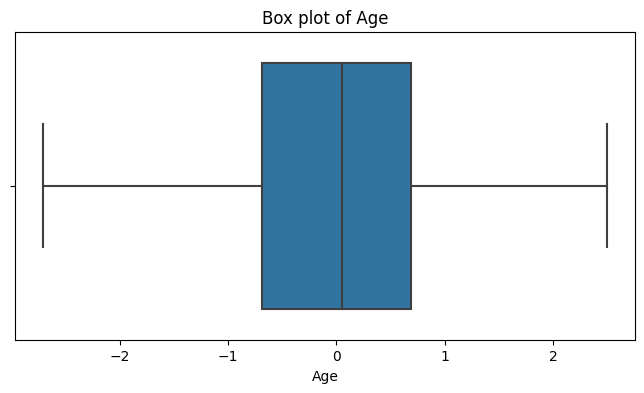

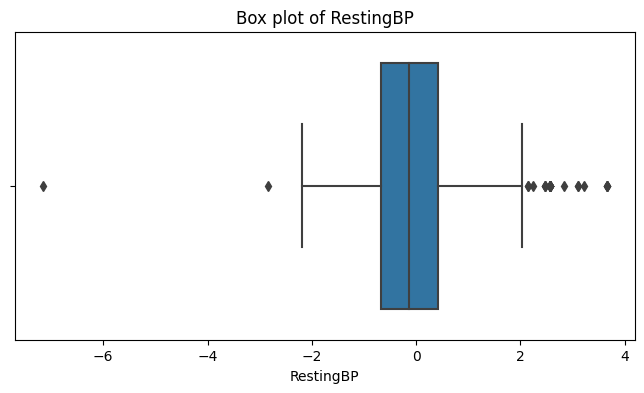

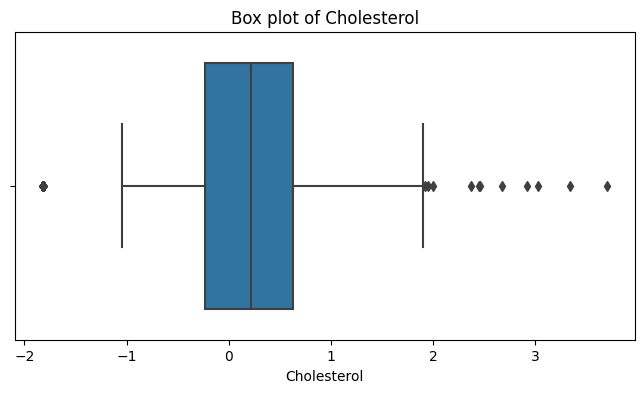

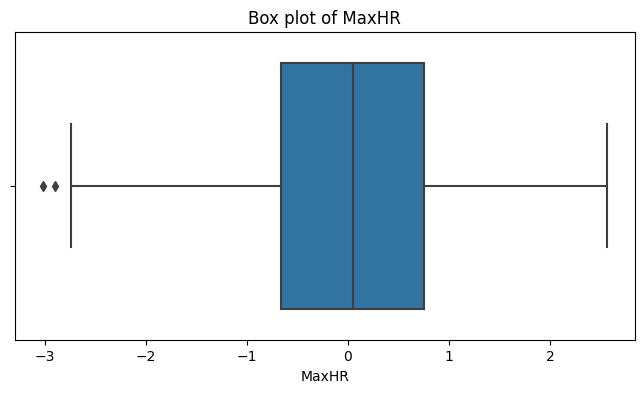

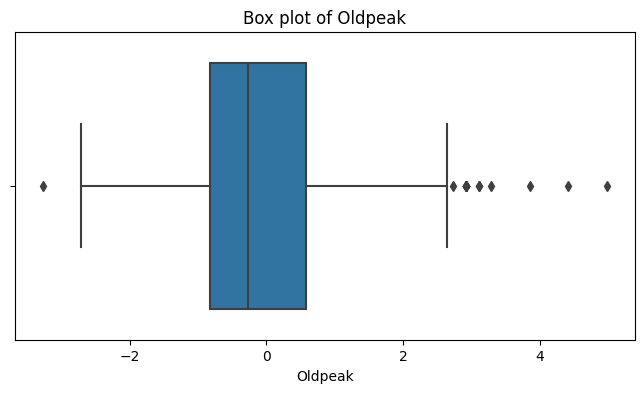

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=feature)
    plt.title(f'Box plot of {feature}')
    plt.show()


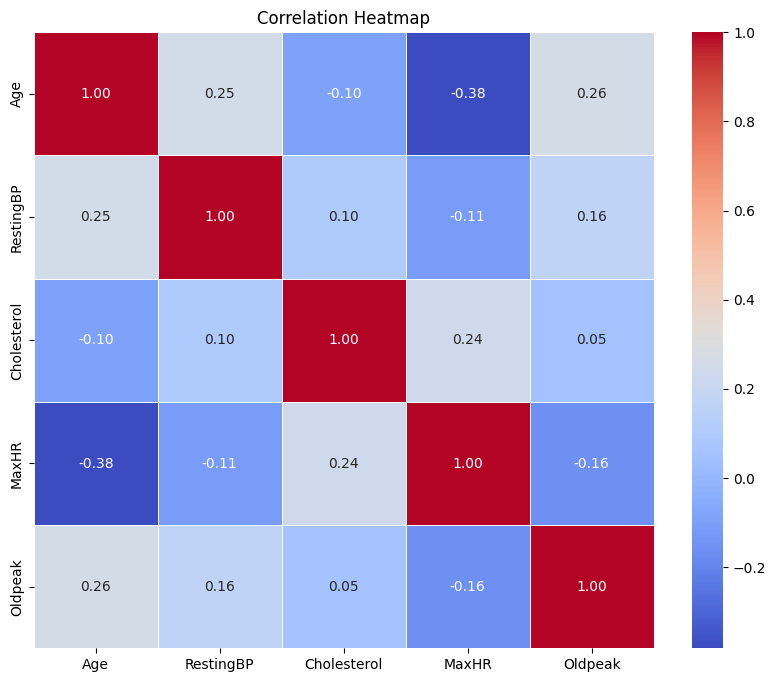

In [ ]:
correlation_matrix = data[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Handling Outliers using IQR**

In [20]:
#removing outliers of box plot
# Removing outliers based on IQR
Q1 = data['RestingBP'].quantile(0.25)
Q3 = data['RestingBP'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['RestingBP'] < (Q1 - 1.5 * IQR)) | (data['RestingBP'] > (Q3 + 1.5 * IQR)))]



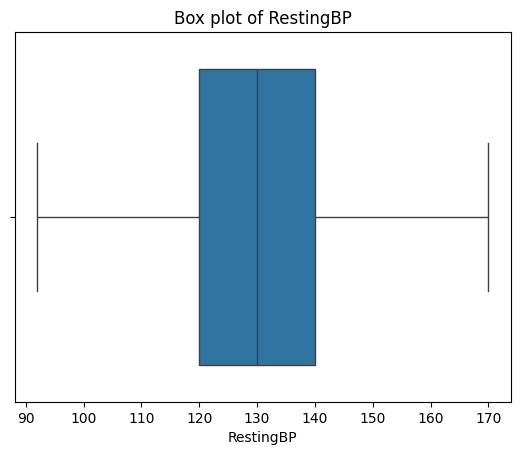

In [21]:
sns.boxplot(data=data, x='RestingBP')
plt.title('Box plot of RestingBP')
plt.show()

In [22]:
Q1 = data['Cholesterol'].quantile(0.25)
Q3 = data['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['Cholesterol'] < (Q1 - 1.5 * IQR)) | (data['Cholesterol'] > (Q3 + 1.5 * IQR)))]


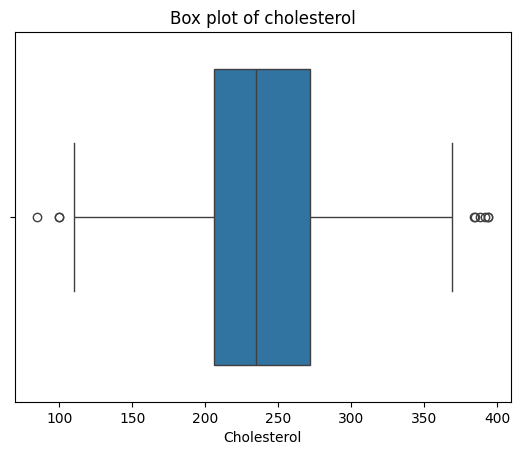

In [23]:
sns.boxplot(data=data, x='Cholesterol')
plt.title('Box plot of cholesterol')
plt.show()

In [ ]:
# as ouliers of cholesterol not removed so trying again by using z score method
Q1 = data['Cholesterol'].quantile(0.25)
Q3 = data['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_iqr = Q1 - 2 * IQR
upper_bound_iqr = Q3 + 2 * IQR

# Using Z-score method
z_scores = zscore(data['Cholesterol'])
abs_z_scores = np.abs(z_scores)

# Combining IQR and Z-score methods
data = data[(abs_z_scores < 3.5) &
            (data['Cholesterol'] > lower_bound_iqr) &
            (data['Cholesterol'] < upper_bound_iqr)]


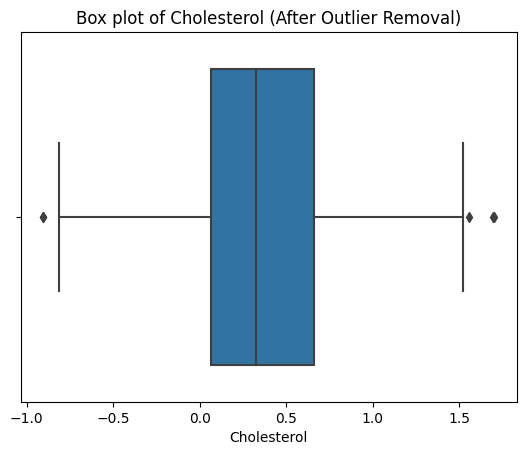

In [ ]:
sns.boxplot(data=data, x='Cholesterol')
plt.title('Box plot of Cholesterol (After Outlier Removal)')
plt.show()

In [ ]:
Q1 = data['MaxHR'].quantile(0.25)
Q3 = data['MaxHR'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['MaxHR'] < (Q1 - 1.5 * IQR)) | (data['MaxHR'] > (Q3 + 1.5 * IQR)))]


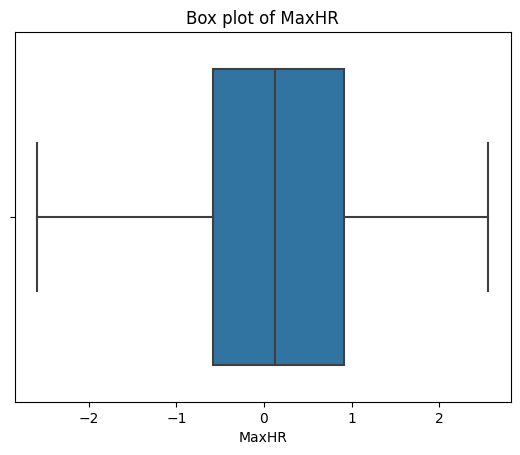

In [ ]:
sns.boxplot(data=data, x='MaxHR')
plt.title('Box plot of MaxHR')
plt.show()

In [ ]:
Q1 = data['Oldpeak'].quantile(0.25)
Q3 = data['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['Oldpeak'] < (Q1 - 1.5 * IQR)) | (data['Oldpeak'] > (Q3 + 1.5 * IQR)))]


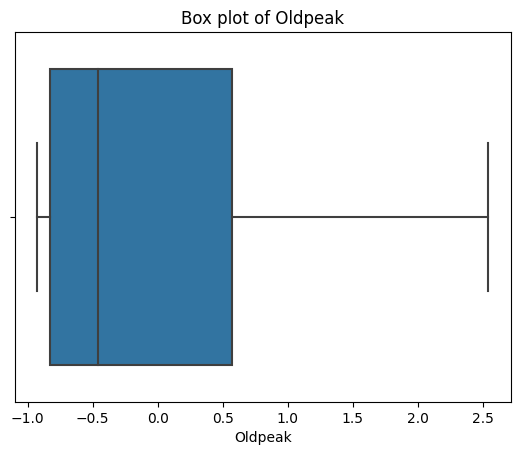

In [ ]:
sns.boxplot(data=data, x='Oldpeak')
plt.title('Box plot of Oldpeak')
plt.show()

In [27]:
X=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
y_train

280    0
58     0
215    0
771    1
724    0
      ..
74     1
112    0
286    0
629    0
107    0
Name: HeartDisease, Length: 570, dtype: int64